Osnabrück University - Machine Learning (Summer Term 2018) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 05

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, May 13, 2018**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's studip folder.

## Assignment 0: Math recap (Derivatives in higher dimensions) [2 Bonus Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a partial derivative? What is a directional derivative? How are these computed?

The partial derivative is the derivative of a multivariate function with respect to one variable. It is computed by holding the other variables "constant" and applying the derivation rules as for single variables (some rules like the chain rule slighty change see c) ). 
The directional derivative is the derivative of all variables with respect to a direction by a derivative. It is computed by the dot product of the directional vector and a vector of the corresponding partial derivatives.

**b)** What is the gradient, the Jacobian matrix, and the Hessian matrix? How are they computed?

The gradient is the vector of all partial derivatives of a multivariate function. 
The Jaccobian Matrix contains for a vector of m functions for each function all n partial derivatives. So the matrix has size nxm (it is convention that it is not nxm)
The Hessian matrix is like the Jaccobian matrix but contains all second derivatives. 

**c)** What is the chain rule (in calculus)? How does it look in the higher-dimensional case?

The chain rule in calculus tells us that if we have a chained function the derivative of this function is the derivative of the outer function times the derivative of the inner function. In multivariate calculus the derivative of a chained function is the derivative of the outer function with respect to the inner function times the derivative of the inner function with respect to the variable we take the derivative of. 

## Assignment 1: Curse of Dimensionality [6 Points]

For the following exercise, be detailed in your answers and provide some examples. Think about keywords like: random vectors in high dimensional space, manifolds and Bertillonage.

**a)** What are the curse of dimensionality and its implication for pattern classification? 

The curse of dimensionality is that for a lot of data the dimension of each data variable (for instance the an HD image vector where each pixel is a dimension of the data vector) is so high that any real data set can not properly fill the vector space. In pattern recognition we try to find underlying structure which is unique in data. In the case of high dimensionality it is more likely that data vectors are orthogonal to each other and have similar distances. This makes it difficult to find meaningful structure in the data. 
As an example the criminalist Alphonse Bertillon (1853-1914) could show that it is possible to distinguish all humans by only 11 anthropometric measurements. Which shows that already in an comperebly low dimensional space a number of data as the whole human population tends not to fill the space.  

**b)** Explain how this phenomenom could be used to one's advantage.

In a high dimensional space (unlike the 2D or 3D space we are familiar with) most of the volumina is in the surface layer of the space. This fact is highly useful in the reduction of dimensionality. Since the data does not fill the high dimensional space as mentioned in a) one can try to find the manifold at which the data tends to concentrate. This manifold has dimensionalty much lower than the dimension of the whole vector space. By finding a representative coordinate system for the manifold one can project the data to the new coordinate system. By this the volumina is drastically reduced since the surface layer is scaled-down. 

**c)** Explain in your own words the concepts of descriptive and intrinsic dimensionality.

Descriptive dimensionality is the dimensionality of the vector space spanned by the parameteres/variables. Where as intrnsic dimensionality is the the dimensionality of the parameters which are necessary to describe the data (for instance after a dimension reduction in the sense as described in b) ). 

## Assignment 2: Implement and Apply PCA [8 Points]

In this assignment you will implement PCA from the ground up and apply it to the `cars` dataset (simplified from the JSE [2004 New Car and Truck Data](http://www.amstat.org/publications/jse/jse_data_archive.htm)). This dataset consists of measurements taken on 97 different cars. The eleven features measured are: Suggested retail price (USD), Price to dealer (USD), Engine size (liters), Number of engine cylinders, Engine horsepower, City gas mileage, Highway gas mileage, Weight (pounds), Wheelbase (inches), Length (inches) and Width (inches). 

We would like to visualize these high dimensional features to get a feeling for how the cars relate to each other so we need to find a subspace of dimension two or three into which we can project the data.

In [11]:
import numpy as np

# TODO: Load the cars dataset in cars.csv .
# YOUR CODE HERE
cars = np.loadtxt('cars.csv',delimiter = ',')
print(cars)

assert cars.shape == (97, 11), "Shape is not (97, 11), was {}".format(cars.shape)

[[  3.69450000e+04   3.33370000e+04   3.50000000e+00 ...,   1.06000000e+02
    1.89000000e+02   7.70000000e+01]
 [  2.69900000e+04   2.46470000e+04   2.40000000e+00 ...,   1.05000000e+02
    1.83000000e+02   6.90000000e+01]
 [  3.18400000e+04   2.88460000e+04   3.00000000e+00 ...,   1.04000000e+02
    1.79000000e+02   7.00000000e+01]
 ..., 
 [  3.17450000e+04   2.99160000e+04   2.50000000e+00 ...,   1.07000000e+02
    1.80000000e+02   7.10000000e+01]
 [  3.77300000e+04   3.55420000e+04   2.90000000e+00 ...,   1.10000000e+02
    1.90000000e+02   7.20000000e+01]
 [  4.12500000e+04   3.88510000e+04   2.90000000e+00 ...,   1.13000000e+02
    1.89000000e+02   7.50000000e+01]]


As a first step we need to normalize the data such that they have a zero mean and a unit standard deviation. Use the standard score for this:
$$\frac{X - \mu}{\sigma}$$

In [22]:
import numpy as np

# TODO: Normalize the data and store them in a variable called cars_norm.
# YOUR CODE HERE
cars_norm = (cars - np.mean(cars, axis=0))/np.std(cars, axis=0)
print(cars_norm)

# Alternatively one could use:
# import sklearn.preprocessing
# cars_norm = sklearn.preprocessing.scale(cars)

assert cars_norm.shape == (97, 11), "Shape is not (97, 11), was {}".format(cars.shape)
assert np.abs(np.sum(cars_norm)) < 1e-10, "Absolute sum was {} but should be close to 0".format(np.abs(np.sum(cars_norm)))
assert np.abs(np.sum(cars_norm ** 2) / cars_norm.size - 1) < 1e-10, "The data is not normalized, sum/N was {} not 1".format(np.sum(cars_norm ** 2) / cars_norm.size)

[[ 0.18736939  0.15961694  0.34406021 ..., -0.20659524  0.25942331
   1.56208964]
 [-0.32067524 -0.32887175 -0.7293674  ..., -0.34872104 -0.187276   -0.7121722 ]
 [-0.07315977 -0.09283447 -0.14386143 ..., -0.49084684 -0.48507554
  -0.42788947]
 ..., 
 [-0.07800801 -0.03268684 -0.63178307 ..., -0.06446944 -0.41062565
  -0.14360674]
 [ 0.22743117  0.28356602 -0.24144576 ...,  0.36190797  0.33387319
   0.14067599]
 [ 0.40707126  0.46957397 -0.24144576 ...,  0.78828537  0.25942331
   0.99352418]]


PCA finds a subspace that maximizes the variance by determining the eigenvectors of the covariance matrix. So we need to calculate the autocovariance matrix and afterwards the eigenvalues. When the data is normalized the autocovariance is calculated as
$$C = X^T\cdot X$$
with $X$ being an $m \times n$ matrix with $n$ features and $m$ samples.
The entry $c_{i,j}$ in $C$ tells you how much feature $i$ correlates with feature $j$. 
(Note: sometimes the formula $C=X\cdot X^T$ can be found, i.e., with rows and columns swapped. This depends on whether your put the individual datapoints as rows or columns in you matrix $X$. However, in the end you want to know how the individual features correlate, i.e., in our example you want a $11\times11$-matrix).

In [65]:
import numpy as np

# TODO: Compute the autocovariance matrix and store it into autocovar
# YOUR CODE HERE

#autocovar = np.cov(np.transpose(cars_norm)) why different result?
autocovar = np.transpose(cars_norm)@cars_norm

assert autocovar.shape == (11, 11)

# TODO: Compute the eigenvalues und eigenvectors and store them into eigenval and eigenvec
#       (Figure out a function to do this for you)
# YOUR CODE HERE
eigenval,eigenvec = np.linalg.eig(autocovar)
sort = eigenval.argsort()[::-1]
eigenval = eigenval[sort]
eigenvec = eigenvec[:,sort]

assert eigenval.shape == (11,)
assert eigenvec.shape == (11, 11)

Now you should have a matrix full of eigenvectors. We can now do two things: project the data down onto the two dimensional subspace to visualize it and we can also plot the two first principle component vectors as eleven two dimensional points to get a feeling for how the features are projected into the subspace. Execute the cells below and describe what you see. Is PCA a good method for this problem? Was it justifiable that we only considered the first two principle components? What kinds of cars are in the four quadrants of the first plot? (**put your answer in the cell below of this code cell**)

<IPython.core.display.Javascript object>


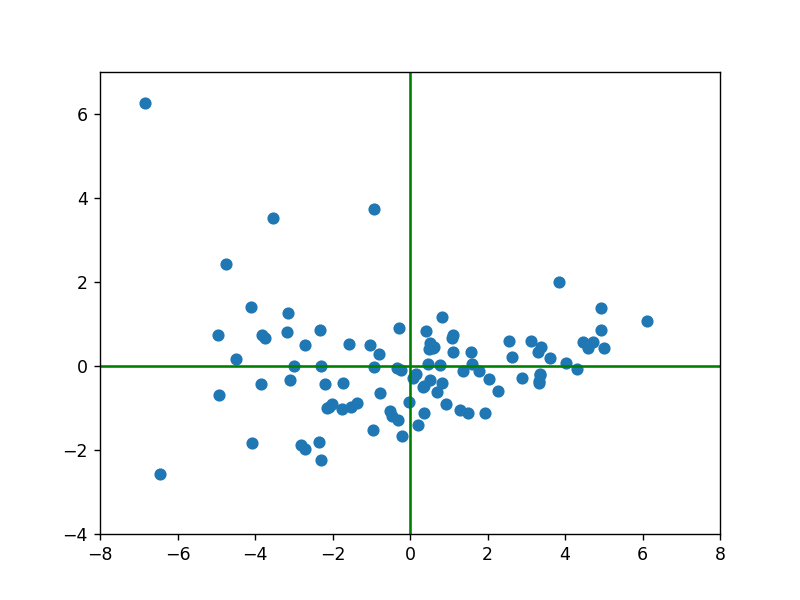

<IPython.core.display.Javascript object>


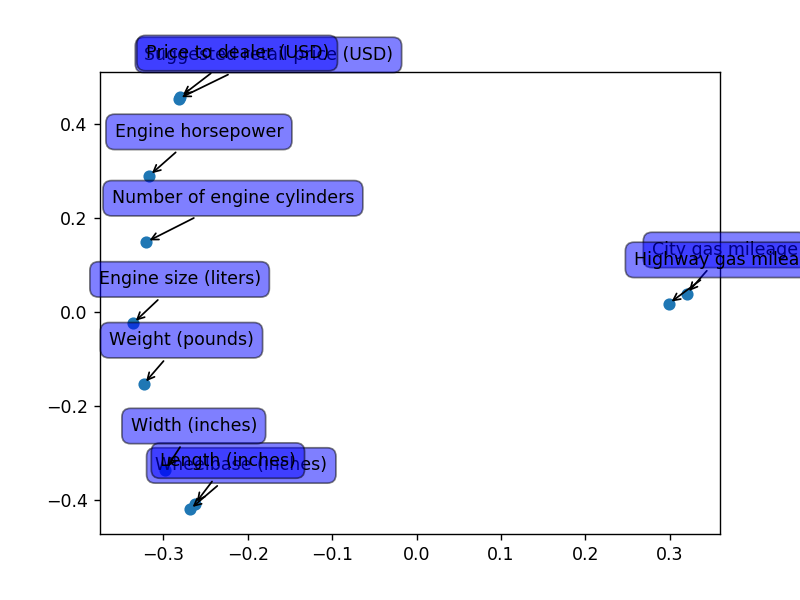

In [66]:
%matplotlib notebook
import matplotlib.pyplot as plt

# Project the data down into the two dimensional subspace
proj = cars_norm @ eigenvec[:,0:2]

# Plot projected data
fig = plt.figure('Data projected onto first two Principal Components')
fig.gca().set_xlim(-8, 8)
fig.gca().set_ylim(-4, 7)
plt.scatter(proj[:,0], proj[:,1])
# Divide plot into quadrants
plt.axhline(0, color='green')
plt.axvline(0, color='green')
# force drawing on 'run all'
fig.canvas.draw()

# Plot eigenvectors
eig_fig = plt.figure('Eigenvector plot')
plt.scatter(eigenvec[:,0], eigenvec[:,1])

# add labels
labels = ['Suggested retail price (USD)', 'Price to dealer (USD)', 
          'Engine size (liters)', 'Number of engine cylinders', 
          'Engine horsepower', 'City gas mileage' , 
          'Highway gas mileage', 'Weight (pounds)', 
          'Wheelbase (inches)', 'Length (inches)', 'Width (inches)']
for label, x, y in zip(labels, eigenvec[:,0], eigenvec[:,1]):
    plt.annotate(
        label, xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
# force drawing on 'run all'
eig_fig.canvas.draw()

The data seems two be well spread out in the 2D space. I think it is difficult to decide if the choice of two PCs is good in a certain case. In some cases the magnitude of the eigenvalues can give an insight if a certain number of PCs capture already most of the variance. Two PCs are certainly good for visualization. 

It is difficult to exactly tell what kind of cars one kind find in the four quadrants. 

- By looking the projection of the 11 feautures of plot two one can guess cars which are big (high width, high length, high Wheelbase) and have low City and Highway gas mileauge are projected to the lower left corner. 

- Expensive cars with high horsepower and low City and Highway gas mileauge proably tend to be found in the left upper corner.

- Small cars with high City and Highway mileage are tend to be found in the higher right corner

- Cheaper cars with high City and Highway mileage are found in the lower right corner


## Assignment 3: PCA [6 Points]

In this exercise we investigate the statement from the lecture that PCA finds the subspace that captures most of the data variance. To be more precise, we show that the orthonormal projection onto an $m$-dimensional subspace that maximizes the variance of the projected data is defined by the principal components, i.e. by the $m$ eigenvectors of the autocorrelation matrix $C$ corresponding to the $m$ largest eigenvalues. We proceed in two steps:

### a)

First consider a one dimensional subspace: determine a (unit) vector $\vec{p}$, such that the variance of the data, when projected onto the subspace determined by that vector, is maximal.

The autocorrelation matrix $C$ allows to compute the variance of the projected data as $\vec{p}^{T}C\vec{p}$. We want to maximize this expression. To avoid $\|\vec{p}\|\to\infty$ we will only consider unit vectors, i.e. we constrain $\vec{p}$ to be normalized: $\vec{p}^T\vec{p}=1$. Maximize the expression with this constraint (which can be done using a Lagrangian multiplier). Conclude that a suitable $\vec{p}$ has to be an eigenvector of $C$ and describe which of the eigenvectors is optimal.

YOUR ANSWER HERE

### b)

Now proof the statement for the general case of an $m$-dimensional projection space.

Use an inductive argument: assume the statement has been shown for the $(m-1)$-dimensional projection space, spanned by the $m-1$ (orthonormal) eigenvectors $\vec{p}_1,\ldots,\vec{p}_{m-1}$ corresponding to the $(m-1)$ largest eigenvalues $\lambda_1,\ldots,\lambda_{m-1}$. Now find a (unit) vector $\vec{p}_m$, orthogonal to the existing vectors $\vec{p}_1,\ldots,\vec{p}_{m-1}$, that maximizes the projected variance $\vec{p}_m^TC\vec{p}_m$. Proceed similar to case (a), but with additional Lagrangian multipliers to enforce the orthogonality constraint. Show that the new vector $\vec{p}_m$ is an eigenvector of $C$. Finally show that the variance is maximized for the eigenvector corresponding to the $m$-th largest eigenvalue $\lambda_m$.

YOUR ANSWER HERE